In [2]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob # to access pathways for multiple csv calls

In [15]:
# all csv into one dataframe
list_all = [pd.read_csv(filename) for filename in glob.glob('./data/*.csv')]
df = pd.concat(list_all,axis=0) # concat row-wise
df.head()

,sale_time,purchaser_gender
0,2012-10-01 01:42:22,female
1,2012-10-01 02:24:53,female
2,2012-10-01 02:25:40,female
3,2012-10-01 02:30:42,female
4,2012-10-01 02:51:32,male


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204329 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   sale_time         204329 non-null  object
 1   purchaser_gender  204329 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


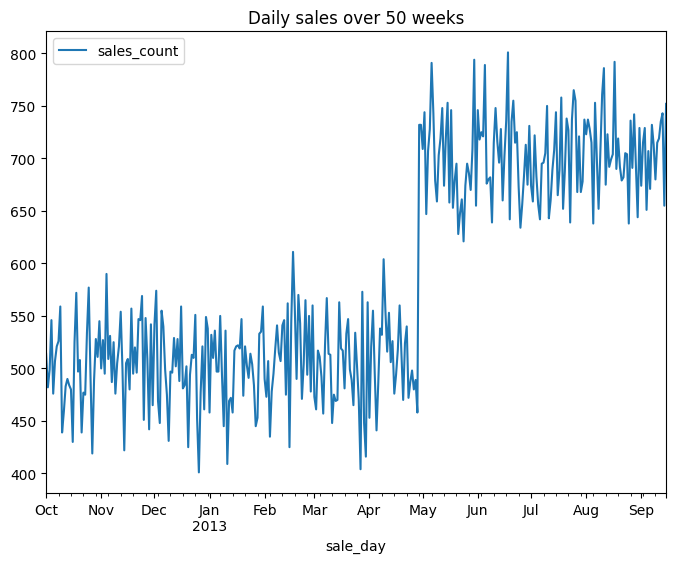

In [37]:
# 1. Plot daily sales for all 50 weeks.

# To do this : sale_time -> sale_day (use groupby...day)

# get daily sales
sale_day = pd.to_datetime(df['sale_time']) # change to datetime to use related functions
# groupby day -> rename axis(time -> day) / get size(sales count each day) -> rename index(sales_count)
daily_sales = sale_day.groupby(sale_day.dt.floor('d')).size().rename_axis('sale_day').reset_index(name='sales_count')

# plot
#  move sale_day to index for plotting
daily_sales.index = daily_sales['sale_day']
daily_sales.drop(columns=['sale_day'], inplace=True)

#  plot daily sales for all 50 weeks
daily_sales.plot(figsize=(8,6), title = "Daily sales over 50 weeks")
plt.show()



In [41]:
# 2. Identify the date on which a sudden change in daily sales occurred.
daily_sales['prev_day_count'] = [None] + daily_sales['sales_count'].to_list()[:-1]